In [1]:
# import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
import os
import cv2
import import_ipynb
import Utils


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import layers,losses


In [4]:
from AutoEncoder import AutoEncoder

In [5]:
image_data = Utils.read_data("Berea_2d25um_binary.raw")
image_data.shape

(1000, 1000, 1000)

In [6]:
voxels = Utils.extract_subvolumes(image_data)
voxels.shape

(64, 250, 256, 256, 1)

In [7]:

# from mpl_toolkits.mplot3d import Axes3D

# # Assuming your voxel is named 'voxel'
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.voxels(voxels[0], edgecolor='k')
# plt.show()

In [8]:
device = tf.config.list_physical_devices("GPU")
print(device)
tf.config.experimental.set_memory_growth(device[0],True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
# n = 10

# plt.figure(figsize=(20,4))
# for i in range(n):
#     ax = plt.subplot(2,n,i+1)
#     plt.imshow(split_images[i])
#     plt.title('original')
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

In [10]:
del image_data

In [11]:
# from tensorflow.keras.models import Model
# from tensorflow.keras import layers,losses
# from CBAM import ConvolutionBlockAttentionModule

# class AutoEncoder(Model):

#     def __init__(self,reducedDimension,originalSize) -> None:
#         super(AutoEncoder,self).__init__()
#         self.reducedDimension = reducedDimension
        
        
#         ########################################## Encoder Layers ##########################################
        
#         self.conv_1 = layers.Conv2D(16, (3,3) ,input_shape = originalSize , activation='relu', padding='same')
#         self.maxPool_1 = layers.MaxPooling2D((2,2), padding='same')
#         self.batchNorm_1 = layers.BatchNormalization()
        
        
#         self.conv_2 = layers.Conv2D(32, (3,3) ,input_shape = originalSize , activation='relu', padding='same')
#         self.maxPool_2 = layers.MaxPooling2D((2,2), padding='same')
#         self.batchNorm_2 = layers.BatchNormalization()
        
        
#         self.conv_3 = layers.Conv2D(64, (3,3) ,input_shape = originalSize , activation='relu', padding='same')
#         self.maxPool_3 = layers.MaxPooling2D((2,2), padding='same')
#         self.batchNorm_3 = layers.BatchNormalization()
        
        
        
#         self.conv_4 = layers.Conv2D(128, (3,3) ,input_shape = originalSize , activation='relu', padding='same')
#         self.maxPool_4 = layers.MaxPooling2D((2,2), padding='same')
#         self.batchNorm_4 = layers.BatchNormalization()
        
        
        
#         self.conv_5 = layers.Conv2D(256, (3,3), activation='relu', padding='same')
#         self.maxPool_5 = layers.MaxPooling2D((2,2), padding='same')
#         self.batchNorm_5 = layers.BatchNormalization()
        
        
#         self.latentDense = layers.Dense(reducedDimension)
        
#         self.batchNorm_6 = layers.BatchNormalization()
        
#         ########################################## Decoder Layers ##########################################
        
        
#         self.upDense = layers.Dense(8*8*256)
#         self.batchNorm_7 = layers.BatchNormalization()
        
#         self.convT_1 = layers.Conv2DTranspose(256, (3,3), strides=2, activation='relu', padding='same')
#         self.batchNorm_8 = layers.BatchNormalization()
        
#         self.cbam_1 = ConvolutionBlockAttentionModule()
#         self.convT_2 = layers.Conv2DTranspose(128, (3,3), strides=2, activation='relu', padding='same')
#         self.batchNorm_9 = layers.BatchNormalization()
        
#         self.cbam_2 = ConvolutionBlockAttentionModule()
#         self.convT_3 = layers.Conv2DTranspose(64, (3,3), strides=2, activation='relu', padding='same')
#         self.batchNorm_10 = layers.BatchNormalization()
        
#         self.cbam_3 = ConvolutionBlockAttentionModule()
#         self.convT_4 = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')
#         self.batchNorm_11 = layers.BatchNormalization()
        
#         self.cbam_4 = ConvolutionBlockAttentionModule()
#         self.convT_5 = layers.Conv2DTranspose(16, (3,3), strides=2, activation='relu', padding='same')
#         self.batchNorm_12 = layers.BatchNormalization()
        
        
#         self.convT_6 = layers.Conv2DTranspose(1, (3,3), activation='sigmoid', padding='same')
        
        
#         def encoder(self,X):
#             x1 = self.conv_1(X)
#             x1d = self.batchNorm_1(x1)
#             x1 = self.maxPool_1(x1d)


#             x2 = self.conv_2(x1)
#             x2d = self.batchNorm_2(x2)
#             x2 = self.maxPool_2(x2d)


#             x3 = self.conv_3(x2)
#             x3d = self.batchNorm_3(x3)
#             x3 = self.maxPool_3(x3d)



#             x4 = self.conv_4(x3)
#             x4d = self.batchNorm_4(x4)
#             x4 = self.maxPool_4(x4d)


#             x5 = self.conv_5(x4)
#             x5d = self.batchNorm_5(x5)
#             x5 = self.maxPool_5(x5d)


#             flat = layers.Flatten()(x5)
#             latentDim = self.latentDense(flat)
#             encodedFeatures = self.batchNorm_6(latentDim)
#             return encodedFeatures.numpy()
        
        
#         def encoder(self,X):
#             x1 = self.conv_1(X)
#             x1d = self.batchNorm_1(x1)
#             x1 = self.maxPool_1(x1d)


#             x2 = self.conv_2(x1)
#             x2d = self.batchNorm_2(x2)
#             x2 = self.maxPool_2(x2d)


#             x3 = self.conv_3(x2)
#             x3d = self.batchNorm_3(x3)
#             x3 = self.maxPool_3(x3d)



#             x4 = self.conv_4(x3)
#             x4d = self.batchNorm_4(x4)
#             x4 = self.maxPool_4(x4d)


#             x5 = self.conv_5(x4)
#             x5d = self.batchNorm_5(x5)
#             x5 = self.maxPool_5(x5d)


#             flat = layers.Flatten()(x5)
#             latentDim = self.latentDense(flat)
#             encodedFeatures = self.batchNorm_6(latentDim)
#             return encodedFeatures.numpy()
        
#         def decoder(self,latentDim):
            
#             up = self.upDense(latentDim)
#             reshapedUp = layers.Reshape((8, 8, 256))(up)
#             reshapedUp = self.batchNorm_7(reshapedUp)

#             x6 = self.convT_1(reshapedUp)
#             x6 = self.batchNorm_8(x6)

#             x6 = self.cbam_1(x6)
#             x7 = self.convT_2(x6)
#             x7 = self.batchNorm_9(x7)
            

#             x7 = self.cbam_2(x7)
#             x8 = self.convT_3(x7)
#             x8 = self.batchNorm_10(x8)
            

#             x8 = self.cbam_3(x8)
#             x9 = self.convT_4(x8)
#             x9 = self.batchNorm_11(x9)
            


#             x9 = self.cbam_4(x9)
#             x10 = self.convT_5(x9)
#             x10 = self.batchNorm_12(x10)
            

#             decoded = self.convT_6(x10)
#             return decoded
    
#     def call(self,X):
        
#         ### encoder
#         x1 = self.conv_1(X)
#         x1d = self.batchNorm_1(x1)
#         x1 = self.maxPool_1(x1d)
        
        
#         x2 = self.conv_2(x1)
#         x2d = self.batchNorm_2(x2)
#         x2 = self.maxPool_2(x2d)
       
        
#         x3 = self.conv_3(x2)
#         x3d = self.batchNorm_3(x3)
#         x3 = self.maxPool_3(x3d)
       
        
        
#         x4 = self.conv_4(x3)
#         x4d = self.batchNorm_4(x4)
#         x4 = self.maxPool_4(x4d)
        
        
#         x5 = self.conv_5(x4)
#         x5d = self.batchNorm_5(x5)
#         x5 = self.maxPool_5(x5d)
        
        
#         flat = layers.Flatten()(x5)
#         latentDim = self.latentDense(flat)
#         latentDim = self.batchNorm_6(latentDim)
        
#         # Decoder
        
#         up = self.upDense(latentDim)
#         reshapedUp = layers.Reshape((8, 8, 256))(up)
#         reshapedUp = self.batchNorm_7(reshapedUp)
        
#         x6 = self.convT_1(reshapedUp)
#         x6 = self.batchNorm_8(x6)
#         x6 = layers.Add()([x6, x5d])
        
#         x6 = self.cbam_1(x6)
#         x7 = self.convT_2(x6)
#         x7 = self.batchNorm_9(x7)
#         x7 = layers.Add()([x7, x4d])
        
#         x7 = self.cbam_2(x7)
#         x8 = self.convT_3(x7)
#         x8 = self.batchNorm_10(x8)
#         x8 = layers.Add()([x8, x3d])
        
#         x8 = self.cbam_3(x8)
#         x9 = self.convT_4(x8)
#         x9 = self.batchNorm_11(x9)
#         x9 = layers.Add()([x9, x2d])
        
        
#         x9 = self.cbam_4(x9)
#         x10 = self.convT_5(x9)
#         x10 = self.batchNorm_12(x10)
#         x10 = layers.Add()([x10, x1d])
        
#         decoded = self.convT_6(x10)
#         return decoded

In [12]:
# X_train = final[:15000]
# #X_test = final[15000:15500]
# X_val = final[15000:16000]
# print(X_train.shape)
# print(X_val.shape)
# del final

In [13]:
# X_train.shape

In [14]:
reducedDimension = 256
autoEncoder = AutoEncoder(reducedDimension,(256,256,1))

In [15]:
# autoEncoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [16]:
dummy_input = tf.ones((1, 256,256,1))

temp = autoEncoder(dummy_input)

In [17]:
autoEncoder.load_weights('saved model/skip_connection_16_32_64_128_256_with_cbam_256_dense.h5')

In [18]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [19]:
tf.keras.backend.clear_session()

In [20]:
autoEncoder.encoder(voxels[0][0])

AttributeError: 'AutoEncoder' object has no attribute 'encoder'

In [60]:
history = autoEncoder.fit(X_train,X_train,
                epochs=10,
                batch_size=16,
                shuffle=True, 
                validation_data=(X_val,X_val)
                )

Epoch 1/10
938/938 [==============================] - 230s 243ms/step - loss: 0.0033 - val_loss: 2.0293e-05
Epoch 2/10
938/938 [==============================] - 228s 243ms/step - loss: 1.1932e-05 - val_loss: 5.2651e-06
Epoch 3/10
938/938 [==============================] - 228s 243ms/step - loss: 3.8167e-06 - val_loss: 1.9420e-06
Epoch 4/10
938/938 [==============================] - 232s 247ms/step - loss: 1.5074e-06 - val_loss: 9.5862e-07
Epoch 5/10
938/938 [==============================] - 231s 246ms/step - loss: 7.6619e-07 - val_loss: 5.6905e-07
Epoch 6/10
938/938 [==============================] - 229s 245ms/step - loss: 4.5028e-07 - val_loss: 3.2889e-07
Epoch 7/10
938/938 [==============================] - 230s 245ms/step - loss: 2.6729e-07 - val_loss: 2.1323e-07
Epoch 8/10
938/938 [==============================] - 228s 243ms/step - loss: 1.6216e-07 - val_loss: 1.3344e-07
Epoch 9/10
938/938 [==============================] - 229s 244ms/step - loss: 9.8797e-08 - val_loss: 7.6638e

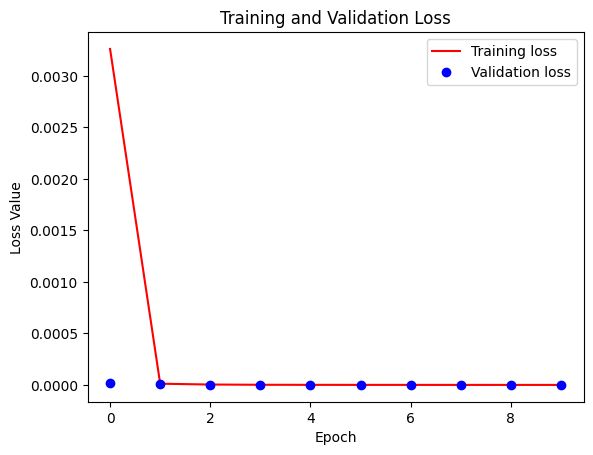

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(10)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
#plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
# encoder.predict(X_test[0]).shape

In [62]:
autoEncoder.summary()

Model: "auto_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
batch_normalization (BatchNo multiple                  64        
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  128       
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                 

In [21]:
image_data = Utils.read_data("BanderaBrown_2d25um_binary.raw")

In [22]:
test_images = Utils.get_split_images(image_data)

test_images.shape

(16000, 250, 250, 1)

In [24]:
final_test = Utils.add_padding(10,test_images)
final_test.shape

(10, 256, 256, 1)

In [67]:
final_test.shape

(10, 256, 256, 1)

# train reconstruction

In [68]:
decodedImgs = autoEncoder.predict(X_train[:10])

In [40]:
encodedImgs[0].shape

NameError: name 'encodedImgs' is not defined

In [69]:
mse = losses.MeanSquaredError()
mse(X_train[:10], decodedImgs).numpy()

4.3818844e-08

In [86]:
# def getFeatures(m,X):
#     x1 = m.conv_1(X)
#     x1d = m.batchNorm_1(x1)
#     x1 = m.maxPool_1(x1d)


#     x2 = m.conv_2(x1)
#     x2d = m.batchNorm_2(x2)
#     x2 = m.maxPool_2(x2d)


#     x3 = m.conv_3(x2)
#     x3d = m.batchNorm_3(x3)
#     x3 = m.maxPool_3(x3d)



#     x4 = m.conv_4(x3)
#     x4d = m.batchNorm_4(x4)
#     x4 = m.maxPool_4(x4d)


#     x5 = m.conv_5(x4)
#     x5d = m.batchNorm_5(x5)
#     x5 = m.maxPool_5(x5d)


#     flat = layers.Flatten()(x5)
#     latentDim = m.latentDense(flat)
#     encodedFeatures = m.batchNorm_6(latentDim)
#     return encodedFeatures.numpy()

In [97]:
batchSize = 15
temp = []
for i in range(X_train.shape[0]//batchSize):
    f=Utils.getFeatures(autoEncoder,X_train[i*batchSize:(i+1)*batchSize ])
    for j in range(batchSize):
        temp.append(f[j])
    
    
temp

[array([ 0.38495085,  1.6329565 , -1.1812081 ,  0.53299826,  1.2024623 ,
        -0.9216889 , -0.5124934 , -0.5172904 ,  0.49520105,  1.1035018 ,
        -1.7162559 , -0.15652642,  1.2051326 , -0.6827266 , -0.5400231 ,
         0.38873827, -0.04268643,  1.2869016 , -0.25796932,  0.07600808,
         0.5536951 ,  1.2040508 , -0.55304253,  0.5934078 ,  0.22632307,
         0.6288341 ,  0.0977107 ,  0.42750227, -0.03559028, -0.27174556,
         0.9342184 , -0.8196668 , -1.0985023 ,  1.0589913 ,  1.2109708 ,
        -0.17054856, -0.801133  , -0.524073  ,  0.66014075, -0.16111124,
        -1.1835347 , -0.24263707, -0.39833003,  0.90522325, -0.18878824,
        -0.37417245, -0.9193602 ,  0.4108705 , -1.3855858 ,  0.432711  ,
         0.35510302,  1.3001297 ,  2.06423   , -0.611739  , -0.26454931,
        -0.31462145, -0.6871456 , -0.6107806 , -0.713846  ,  0.28197998,
        -0.61536425, -0.3325189 , -1.5474617 ,  1.8862298 , -0.4443312 ,
         0.7634136 , -1.518998  , -1.7159904 , -0.7

In [100]:
np.save('X_train_features.npy', np.array(temp))

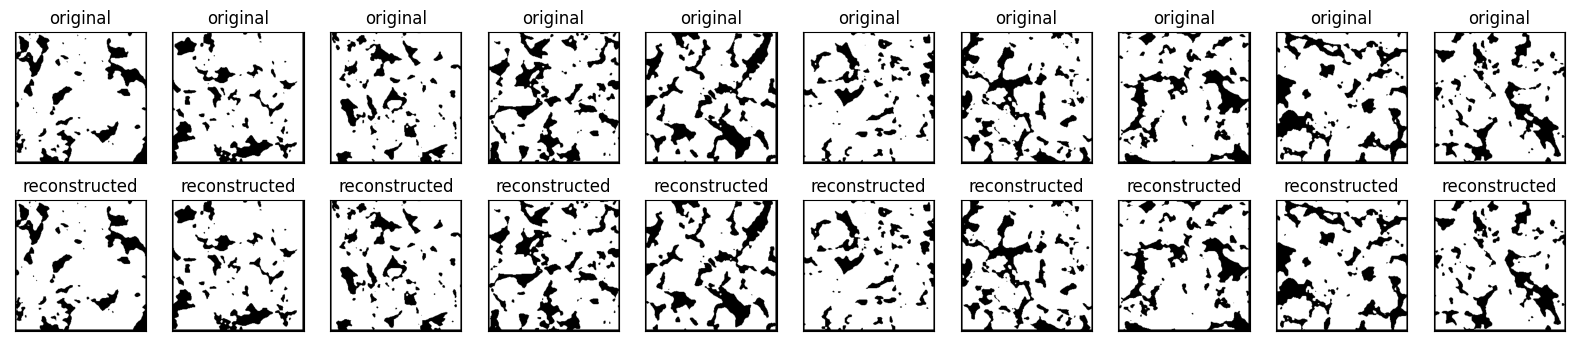

In [70]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    # original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_train[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decodedImgs[i])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# validation reconstruction

In [71]:
valdecodedImgs = autoEncoder.predict(X_val[:10])

In [72]:
mse = losses.MeanSquaredError()
mse(X_val[:10], valdecodedImgs).numpy()

3.429975e-08

In [102]:

batchSize = 10
temp = []
for i in range(X_val.shape[0]//batchSize):
    f=getFeatures(autoEncoder,X_val[i*batchSize:(i+1)*batchSize ])
    for j in range(batchSize):
        temp.append(f[j])
    
    
temp
np.save('X_val_features.npy', np.array(temp))

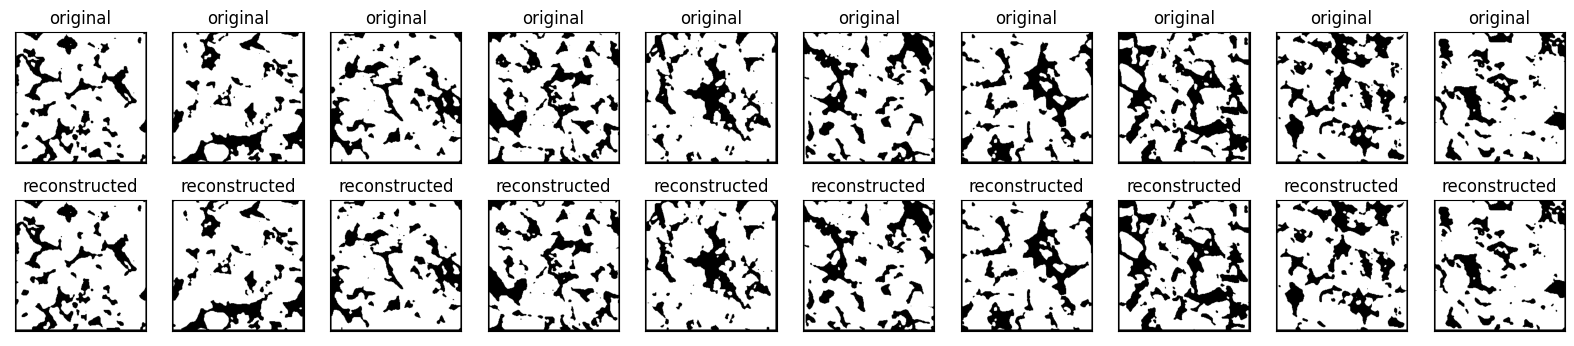

In [73]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    # original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_val[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(valdecodedImgs[i])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Test Recontrsuction

In [74]:
# TestencodedImgs = autoEncoder.encoder(final_test[:10]).numpy()
# TestdecodedImgs = autoEncoder.decoder(TestencodedImgs).numpy()
TestdecodedImgs = autoEncoder.predict(final_test[:10])

In [75]:
mse = losses.MeanSquaredError()
mse(final_test[:10], TestdecodedImgs).numpy()

4.71436e-08

In [104]:
final_test.shape

(10, 256, 256, 1)

In [105]:
pad_size = 3
final_test = []
for i in range(test_images.shape[0]):
    final_test.append(np.pad(test_images[i], ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant'))

final_test = np.array(final_test)

In [106]:
batchSize = 16
temp = []
for i in range(final_test.shape[0]//batchSize):
    f=getFeatures(autoEncoder,final_test[i*batchSize:(i+1)*batchSize ])
    for j in range(batchSize):
        temp.append(f[j])
    
    
np.save('X_test_features.npy', np.array(temp))

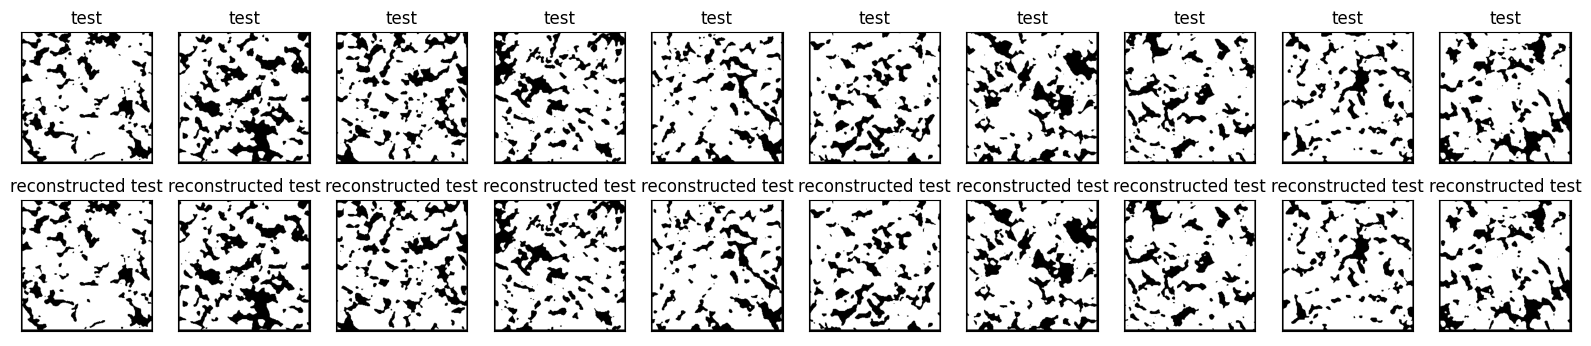

In [76]:
n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    # original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(final_test[i])
    plt.title('test')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(TestdecodedImgs[i])
    plt.title('reconstructed test')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [77]:
autoEncoder.save_weights('saved model/skip_connection_16_32_64_128_256_without_cbam_256_dense.h5')